# Tutorial 7

Having troubles implementing multivariate $t$-distribution. The results here is different from the one done in `R`.

In [1]:
import matplotlib.pyplot as plt
from math import log, exp, sqrt, pi
import numpy as np
from scipy import optimize, stats, special

In [2]:
NUM_VARIATES = 10000

Q1b:

Find the maximiser of

\begin{align*}
    \ell(\eta)
        &:=\log p(\eta|\boldsymbol{y}) + C\\
        &=125\log\left(2+\frac{\mathrm{e}^{\eta}}{1+\mathrm{e}^{\eta}}\right)
        -39\log\left(1+\mathrm{e}^{\eta}\right)
        +35\log\left(\frac{\mathrm{e}^{\eta}}{1+\mathrm{e}^{\eta}}\right)\\
        &=125\log\left(2+\frac{\mathrm{e}^{\eta}}{1+\mathrm{e}^{\eta}}\right)
        -74\log\left(1+\mathrm{e}^{\eta}\right)
        +35\eta
\end{align*}

In [3]:
def log_pos_1a(eta):
    return 125*log(2+(exp(eta)/(1+exp(eta)))) - 74*log(1+exp(eta)) + 35*eta

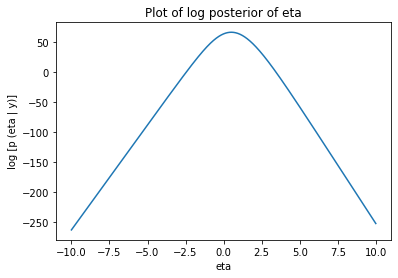

In [4]:
x = np.linspace(-10, 10, NUM_VARIATES)
true_pos_variates = [log_pos_1a(i) for i in x]

plt.plot(x, true_pos_variates)
plt.xlabel("eta")
plt.ylabel("log [p (eta | y)]")
plt.title("Plot of log posterior of eta")
plt.show()

In [5]:
minima = optimize.minimize(lambda x: -log_pos_1a(x), x0=0.5)
minima

      fun: -65.93283274195817
 hess_inv: array([[0.04731336]])
      jac: array([9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([0.50660042])

In [6]:
stats.norm.ppf([0.025, 0.9725], minima.x, sqrt(minima.hess_inv))

array([0.08027623, 0.92398736])

In [7]:
1 - 1/(1+exp(0.08027298)), 1 - 1/(1+exp(0.92399065))

(0.5200574757077301, 0.7158545298788431)

Q1c: Rejection sampling from the following posterior kernel

\begin{align*}
    \text{Posterior kernel: }
    f(\eta)
        &=p(\eta|\boldsymbol{y})
        =\left(2+\frac{\mathrm{e}^{\eta}}{1+\mathrm{e}^{\eta}}\right)^{125} \frac{1}{\left(1+\mathrm{e}^{\eta}\right)^{39}}\left(\frac{\mathrm{e}^{\eta}}{1+\mathrm{e}^{\eta}}\right)^{35},\ \eta\in\mathbb{R}\\
    \text{Wrong proposal density: }
        g(t)
            &=p(t)
            =\frac{\Gamma(2.5)}{\Gamma(2) \sqrt{4 \pi}}\left(1+\frac{t^{2}}{4}\right)^{-2.5}, \quad t \in \mathbb{R}\\
        \log[g(t)]
            &=\log\left(\frac{\Gamma(2.5)}{\Gamma(2) \sqrt{4 \pi}}\right) - 2.5\log\left(1+\frac{t^{2}}{4}\right)\\
            &=\log\left(\frac{\Gamma(2.5)}{\sqrt{4 \pi}}\right) - 2.5\log\left(1+\frac{t^{2}}{4}\right)\\
    \text{Correct proposal density: }
        g'(t, \mu, \sigma)
            &=\frac{\Gamma(2.5)}{(4\pi)^{\frac{1}{2}}\sigma^{\frac{1}{2}}}\left[1+\frac{(t-\mu)^2}{4\sigma}\right]^{-2.5}, \quad t \in \mathbb{R}\\
        \log g'(t, \mu, \sigma)
            &=\log[\Gamma(2.5)] - \frac{1}{2}\log(4\pi\sigma) - \frac{5}{2}\log\left(1+\frac{(t-\mu)^2}{4\sigma}\right)
\end{align*}
Find $\displaystyle
            c'
                :=\operatorname*{\max}_{x\in\mathbb{R}}[\log f(x)-\log g(x)]$ and set $c:=e^{c'}$, then follow the following algorithm to generate a random variate from $f(\eta)$.
                
**Algorithm:**

1. Generate $U$ from $\operatorname{Uniform}[0,1]$.
2. Generate $Y$ from $t_4$.
3. If $\log(Uc) \le \log f(Y) - \log g(Y)$, return $Y$
4. Else go back to step 1.

\begin{align*}
    p(\mathbf{x})=\frac{\Gamma(\frac{4+1}{2})}{\Gamma(\frac{4}{2})(4\pi)^{\frac{1}{2}}\sigma^{\frac{1}{2}}}\left[1+\frac{(\mathbf{x}-\boldsymbol{\mu})^{\top} \sigma^{-1}(\mathbf{x}-\boldsymbol{\mu})}{4}\right]^{-\frac{4+1}{2}}
\end{align*}

In [56]:
def log_g_correct(t, loc, scale):
    return log(special.gamma(2.5)) - 0.5*log(4*pi*scale) - 2.5*log(1+ (t-loc)**2/(4*scale))

In [8]:
def log_g(t):
    return log(special.gamma(2.5)/sqrt(4*pi)) - 2.5*log(1+0.25*t**2)

def g(t):
    return special.gamma(2.5) / sqrt(4*pi) * ( (1 + 0.5*t**2)**(-2.5) )

In [61]:
loc = minima.x[0]
loc

0.5362058231047678

In [62]:
scale = minima.hess_inv[0][0]
scale

0.04975826692646999

The plot function that we want to minimise:

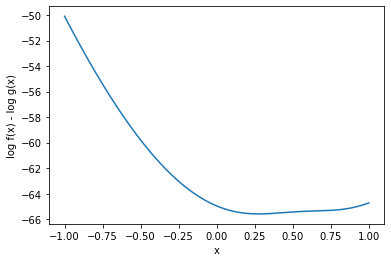

In [90]:
x = np.linspace(-1, 1, NUM_VARIATES)

plt.plot(x, [-(log_pos_1a(i) - log_g_correct(i, loc=loc, scale=1*scale)) for i in x])
plt.xlabel("x")
plt.ylabel("log f(x) - log g(x)")
plt.show()

In [213]:
minima = optimize.minimize(lambda x: -(log_pos_1a(x) - log_g_correct(x, loc=loc, scale=1*scale)), x0=1)
minima

      fun: -65.58370043846338
 hess_inv: array([[0.08507943]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([0.27482409])

In [214]:
c = exp(minima.x)

In [215]:
def rej_samp_1c():
    count = 0
    
    while True:
        count += 1
        U = np.random.uniform()
        Y = stats.t.rvs(df=4, size=1)
        
        if log(U*c) <= log_pos_1a(Y) - log_g_correct(Y, loc=loc, scale=2*scale):
            return Y[0], count

In [216]:
counts = []

for i in range(NUM_VARIATES):
    counts += [rej_samp_1c()[1]]

NUM_VARIATES / sum(counts)

0.9603380389897244

In [217]:
pos_variates = [rej_samp_1c()[0] for i in range(NUM_VARIATES)]

In [218]:
x = np.linspace(-3,3, NUM_VARIATES)
true_pos_variates = [exp(log_pos_1a(i)) for i in x]

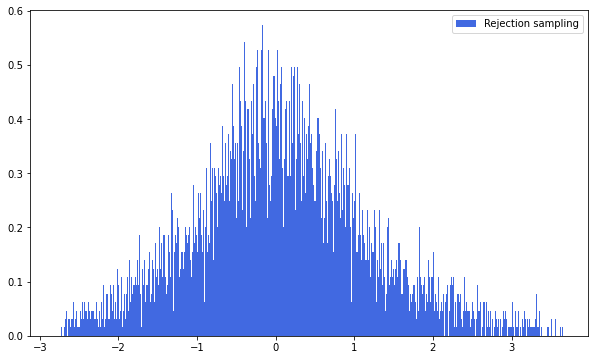

In [219]:
plt.figure(figsize=(10,6))
plt.hist(pos_variates, bins=1000, color="royalblue", density=True)
# plt.plot(x, abs(x), color="red")

plt.legend(["Rejection sampling", "True posterior"])
plt.show()